## Étape 1 : Importer les packages

In [1]:
# Importer numpy et pandas et matplotlib
import numpy as np
import pandas as pd
import matplotlib

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

## Étape 2 : Charger les données

In [3]:
# Charger les donnees
dataset = pd.read_csv('Data/studentscores.csv')

In [4]:
dataset.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


## Étape 3 : Analyser les données

In [5]:
# Verification de valeurs manquantes
dataset.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [6]:
dataset.shape

(25, 2)

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


## Étape 4 : Prétraitement des données

### Étape 5 : Diviser les données en X et y (X_train et X_test, y_train, y_test)

In [8]:
X = dataset.iloc[ : , :1 ].values
#X = dataset.iloc[ : , :-1 ].values

In [9]:
y = dataset.iloc[ : , 1].values
#y = dataset.iloc[ : , -1].values

In [10]:
X

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [11]:
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86])

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)

In [14]:
print("X-train:", X_train.shape)
print("X-test:", X_test.shape)
print("y-train:", y_train.shape)
print("y-test:", y_test.shape)

X-train: (20, 1)
X-test: (5, 1)
y-train: (20,)
y-test: (5,)


In [15]:
X_train

array([[3.8],
       [1.9],
       [7.8],
       [6.9],
       [1.1],
       [5.1],
       [7.7],
       [3.3],
       [8.3],
       [9.2],
       [6.1],
       [3.5],
       [2.7],
       [5.5],
       [2.7],
       [8.5],
       [2.5],
       [4.8],
       [8.9],
       [4.5]])

In [16]:
X_test

array([[1.5],
       [3.2],
       [7.4],
       [2.5],
       [5.9]])

In [17]:
y_test

array([20, 27, 69, 30, 62])

## Étape 6 : Construire le modèle de la régression linéaire

In [18]:
from sklearn.linear_model import LinearRegression

In [19]:
modele_lineaire = LinearRegression()

In [20]:
# Entrainement du Modele
modele_lineaire.fit(X_train, y_train)

LinearRegression()

In [21]:
# Faire de prediction
y_score_predits = modele_lineaire.predict(X_test)
y_score_predits_train = modele_lineaire.predict(X_train)

In [44]:
y_test

array([20, 27, 69, 30, 62])

In [43]:
y_score_predits

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [24]:
y_score_predits_train

array([39.67865467, 20.84840735, 79.32128059, 70.40168976, 12.91988217,
       52.56250809, 78.33021494, 34.72332643, 84.27660883, 93.19619966,
       62.47316457, 36.70545772, 28.77693254, 56.52677068, 28.77693254,
       86.25874013, 26.79480124, 49.58931115, 90.22300272, 46.6161142 ])

In [25]:
y_test

array([20, 27, 69, 30, 62])

## Étape 7 : Visualiser la ligne de la régression dans un graphique

In [26]:
import matplotlib.pyplot as plt

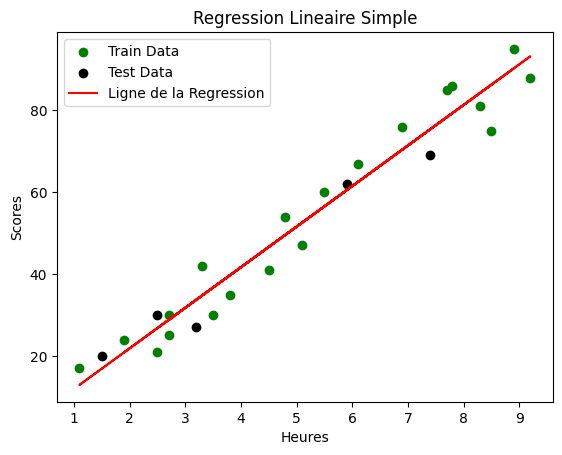

In [33]:
plt.scatter(X_train, y_train, color='green', label='Train Data')
plt.scatter(X_test, y_test, color='black', label='Test Data')
plt.plot(X_train, y_score_predits_train, color='red', label='Ligne de la Regression')
plt.xlabel('Heures')
plt.ylabel('Scores')
plt.title('Regression Lineaire Simple')
plt.legend()
plt.show()

In [34]:
dataset.head(3)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27


In [35]:
modele_lineaire.intercept_

np.float64(2.0181600414346974)

In [36]:
modele_lineaire.coef_

array([9.91065648])

In [37]:
b0 = modele_lineaire.intercept_
print(b0)

2.0181600414346974


In [38]:
b1= modele_lineaire.coef_
print(b1)

[9.91065648]


In [39]:
score = b0 + b1 * 1.5
score

array([16.88414476])

In [40]:
modele_lineaire.predict([[1.5]])

array([16.88414476])

In [41]:
X_test

array([[1.5],
       [3.2],
       [7.4],
       [2.5],
       [5.9]])

## Étape 8 : Evaluer les modeles

In [42]:
print("MSE de LR:", mean_squared_error(y_test, y_score_predits))
print("MAE de LR:", mean_absolute_error(y_test, y_score_predits))
print("R2 Score de LR:", r2_score(y_test, y_score_predits))

MSE de LR: 21.598769307217406
MAE de LR: 4.183859899002975
R2 Score de LR: 0.9454906892105355


# Autres Modeles

### Decion Tree

In [45]:
from sklearn.tree import DecisionTreeRegressor

In [46]:
# Creation de l'instance du modele
modele_dt = DecisionTreeRegressor()
# Entrainement du modele
modele_dt.fit(X_train, y_train)
# La prediction
y_score_dt = modele_dt.predict(X_test)

In [47]:
# Evaluation
print("MSE de LR:", mean_squared_error(y_test, y_score_dt))
print("MAE de LR:", mean_absolute_error(y_test, y_score_dt))
print("R2 Score de LR:", r2_score(y_test, y_score_dt))

MSE de LR: 119.2
MAE de LR: 9.6
R2 Score de LR: 0.6991722188572582


### Random Forest

In [48]:
from sklearn.ensemble import RandomForestRegressor

In [49]:
# Creation de l'instance du modele
modele_rf = RandomForestRegressor()
# Entrainement du modele
modele_rf.fit(X_train, y_train)
# La prediction
y_score_rf = modele_rf.predict(X_test)

In [50]:
# Evaluation
print("MSE de LR:", mean_squared_error(y_test, y_score_rf))
print("MAE de LR:", mean_absolute_error(y_test, y_score_rf))
print("R2 Score de LR:", r2_score(y_test, y_score_rf))

MSE de LR: 83.46712194444441
MAE de LR: 7.415666666666667
R2 Score de LR: 0.7893521049251857
